 # Turbofan Engine Dataset

Prognostics focuses on predicting when a machine won’t work at all as expected. The predicted time at which the machine won’t work at all is called the Remaining Useful Life (RUL) of a machine. Prognostics predicts the RUL of a machine based on the deviation from its normal operating conditions. Prognostics requires us to have a good knowledge of various failure points which can degrade the performance of a machine in the future. If the failure points are detected and analysed early, then the data can be used to mitigate the risks. The machine should be analysed to find various parameters which can help us to measure the RUL of a machine. Prognosis is used a lot for predictive maintenance.

In this project, I will use the Turbofan engine degradation simulation data set provided by the Prognostics CoE at NASA Ames. This dataset will help us to predict the RUL for turbofan engine. Turbofan Engine degradation simulation was carried out using C-MAPSS tool. Sensor measurements were taken to find patterns. Data sets consists of multiple multivariate time series. The data set is divided into train and test sets. Each time series is from a different engine. Each engine starts with different degrees of initial wear and manufacturing variation which is not known. 

At the start of each time series, the engine operates normally. At some point during the time series, a fault develops. In the training set, the fault grows until a failure occurs. In the test set, the time series ends some time before the system failure. The dataset provides a vector of true Remaining Useful Life (RUL) values for the test data.

The dataset contains 26 columns. Each row in the dataset is the data captured during a particular operational cycle. The columns in the dataset are as follows:-

1)	unit number

2)	time, in cycles

3)	operational setting 1

4)	operational setting 2

5)	operational setting 3

6)	sensor measurement  1

7)	sensor measurement  2

...

26)	sensor measurement  26

## Data processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import sys
oldsysstdout = sys.stdout
class flushfile():
    def __init__(self, f):
        self.f = f
    def __getattr__(self,name): 
        return object.__getattribute__(self.f, name)
    def write(self, x):
        self.f.write(x)
        self.f.flush()
    def flush(self):
        self.f.flush()
sys.stdout = flushfile(sys.stdout)

### Train data

In [2]:
index_columns = ["Unit", "Cycle"]
settings_columns = ["setting" + str(i + 1) for i in range(3)]
sensor_columns = ["s" + str(i + 1) for i in range(21)]
final_columns = index_columns + settings_columns + sensor_columns
engine_data = pd.read_csv("CMAPSSData/train_FD001.txt", header=None, sep=" ")
engine_data = engine_data[engine_data.columns[0:26]]
engine_data.columns = final_columns

engine_data

,Unit,Cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694


In [3]:
# Data statistics

engine_data.copy(deep=True).drop(['Unit'], axis=1).describe()


,Cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb0d24d9e8>,
      dtype=object)

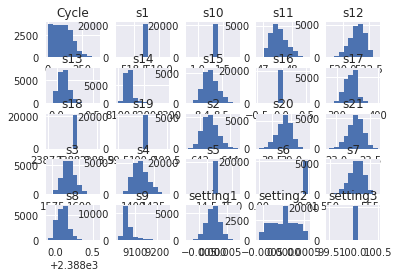

In [4]:
# Histogram

engine_data.copy(deep=True).drop(['Unit'], axis=1).hist()

### Test data

In [6]:
engine_data_test = pd.read_csv("CMAPSSData/test_FD001.txt", header=None, sep=" ")
engine_data_test = engine_data_test[engine_data_test.columns[0:26]]
engine_data_test.columns = final_columns

engine_data_test

,Unit,Cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
5,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,...,521.92,2388.08,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467
6,1,7,-0.0000,0.0002,100.0,518.67,642.11,1583.34,1404.84,14.62,...,522.01,2388.06,8134.97,8.3914,0.03,391,2388,100.0,38.85,23.3952
7,1,8,0.0006,-0.0000,100.0,518.67,642.54,1580.89,1400.89,14.62,...,522.09,2388.06,8125.93,8.4213,0.03,393,2388,100.0,39.05,23.3224
8,1,9,-0.0036,0.0000,100.0,518.67,641.88,1593.29,1412.28,14.62,...,522.03,2388.05,8134.15,8.4353,0.03,391,2388,100.0,39.10,23.4521
9,1,10,-0.0025,-0.0001,100.0,518.67,642.07,1585.25,1398.64,14.62,...,522.00,2388.06,8134.08,8.4093,0.03,391,2388,100.0,38.87,23.3820


### Data Labeling

Questions

1) What is the remaining useful life of engine 1 at cycle 1?

In [7]:
engine_data[engine_data['Unit'] == 1].head()

,Unit,Cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [8]:
engine_data[engine_data['Unit'] == 1].tail()

,Unit,Cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,...,520.08,2388.32,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649


Based on the above observations, since the last cycle entry for engine 1 is 192, the engine fails at cycle no 192. Therefore the remaining useful life for engine 1 at cycle 1 is 191.

In [9]:
# Label Train Data

def get_RUL(engine_data):
    # Last cycle for a particular engine
    last_cycle = engine_data.groupby(['Unit'])["Cycle"].max().reset_index()
    
    # Merge last_cycle with engine_data based on Unit
    final = pd.merge(engine_data, last_cycle, how="inner", on=["Unit"])
    
    # In the training data set, time series ends with a failure
    # last cycle - current cycle will be the remaining useful life (RUL)
    engine_data["RUL"] = final["Cycle_y"] - final["Cycle_x"]
    
    # The binary_class will be 0 if RUL > 30. The binary_class will be 1 if RUL <= 30
    engine_data["binary_class"] = engine_data["RUL"].map(lambda x: 1 if x <= 30 else 0)
    
    # The multi_class will be 0 if RUL > 30. The multi_class will be 1 if  15 < RUL <= 30. 
    # The multi_class will be 2 if RUL <= 15
    engine_data["multi_class"] = engine_data["RUL"].map(lambda x: 2 if x <= 15 else 1 if x<= 30 else 0)
    return engine_data

train_labels = get_RUL(engine_data.copy(deep=True))
RUL_train = train_labels["RUL"]
binary_class_train = train_labels["binary_class"]
multi_class_train = train_labels["multi_class"]

train_labels

,Unit,Cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,RUL,binary_class,multi_class
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,0,0
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,8.4108,0.03,391,2388,100.0,38.98,23.3669,186,0,0
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,8.3974,0.03,392,2388,100.0,39.10,23.3774,185,0,0
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,8.4076,0.03,391,2388,100.0,38.97,23.3106,184,0,0
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,8.3728,0.03,392,2388,100.0,39.05,23.4066,183,0,0
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,8.4286,0.03,393,2388,100.0,38.95,23.4694,182,0,0


In [19]:
# Label Test Data

# RUL_FD001.txt contains the RUL for the last cycle for all the engines in the test data set
# In the test set, the time series ends some time before the system failure.
remaining_RUL_test = pd.read_csv("CMAPSSData/RUL_FD001.txt", header=None)
remaining_RUL_test["Unit"] = remaining_RUL_test.index + 1


def get_RUL_test(engine_data_test, remaining_RUL_test):
    # Get the last cycle for all the engines in the test data set
    last_cycle = engine_data_test.copy(deep=True).groupby(['Unit'])["Cycle"].max().reset_index()
    
    # Since remaining_RUL_test contains RUL only for the last cycle in the test data set, 
    # we only keep the last cycle for each engine in the test data set
    final = pd.merge(last_cycle, engine_data_test.copy(deep=True), how="inner", on=["Unit", "Cycle"])
    final = pd.merge(final, remaining_RUL_test, how="inner", on=["Unit"])
    final["RUL"] = final[0]
    # The binary_class will be 0 if RUL > 30. The binary_class will be 1 if RUL <= 30
    final["binary_class"] = final["RUL"].map(lambda x: 1 if x <= 30 else 0)
    # The multi_class will be 0 if RUL > 30. The multi_class will be 1 if  15 < RUL <= 30. 
    # The multi_class will be 2 if RUL <= 15
    final["multi_class"] = final["RUL"].map(lambda x: 2 if x <= 15 else 1 if x<= 30 else 0)
    return final

test_labels = get_RUL_test(engine_data_test.copy(deep=True), remaining_RUL_test)
RUL_test = test_labels["RUL"]
binary_class_test = test_labels["binary_class"]
multi_class_test = test_labels["multi_class"]

test_labels

,Unit,Cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s16,s17,s18,s19,s20,s21,0,RUL,binary_class,multi_class
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,0.03,393,2388,100.0,38.81,23.3552,112,112,0,0
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,0.03,391,2388,100.0,38.81,23.2618,98,98,0,0
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,0.03,395,2388,100.0,38.93,23.2740,69,69,0,0
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,0.03,395,2388,100.0,38.58,23.2581,82,82,0,0
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,0.03,394,2388,100.0,38.75,23.4117,91,91,0,0
5,6,105,0.0076,-0.0003,100.0,518.67,643.05,1586.94,1404.49,14.62,...,0.03,393,2388,100.0,38.91,23.3269,93,93,0,0
6,7,160,0.0016,-0.0001,100.0,518.67,642.10,1589.59,1413.57,14.62,...,0.03,393,2388,100.0,38.91,23.2763,91,91,0,0
7,8,166,0.0016,-0.0005,100.0,518.67,642.59,1591.91,1413.89,14.62,...,0.03,393,2388,100.0,38.73,23.2465,95,95,0,0
8,9,55,-0.0003,0.0004,100.0,518.67,642.27,1593.61,1410.27,14.62,...,0.03,392,2388,100.0,38.78,23.3515,111,111,0,0
9,10,192,-0.0018,0.0004,100.0,518.67,643.00,1589.50,1398.99,14.62,...,0.03,393,2388,100.0,38.79,23.2956,96,96,0,0


## Exploratory Visualization

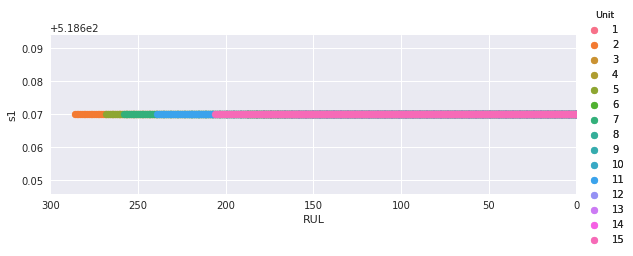

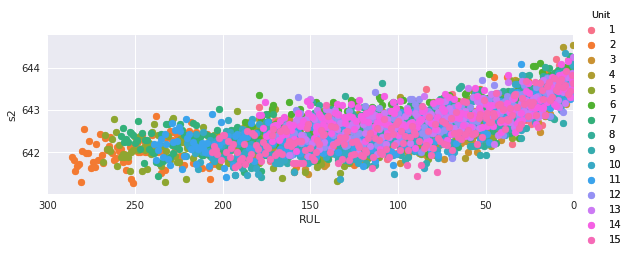

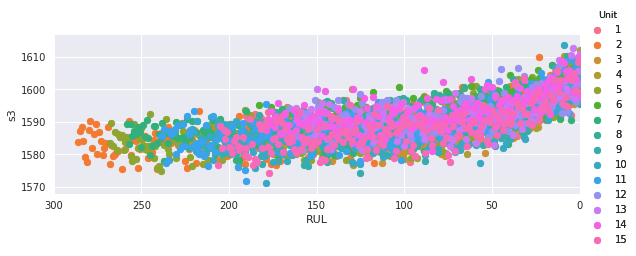

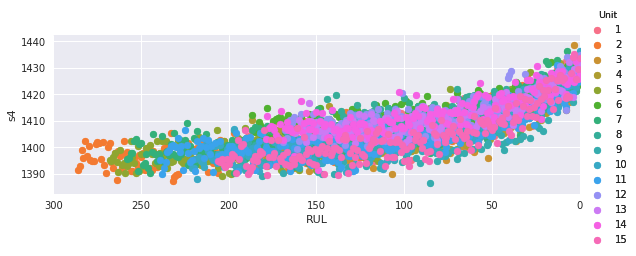

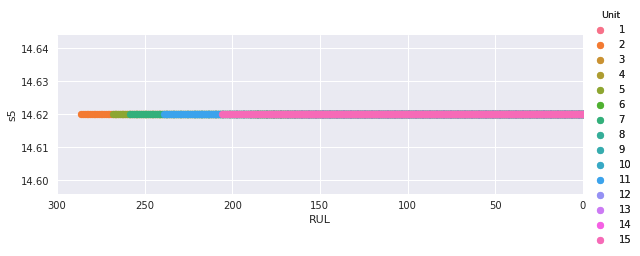

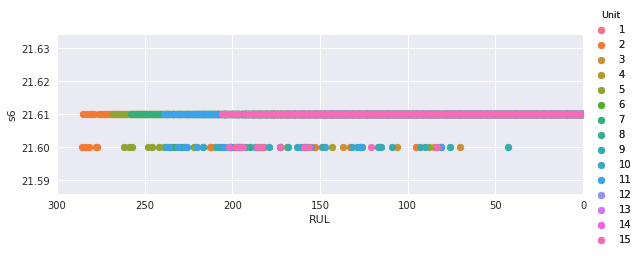

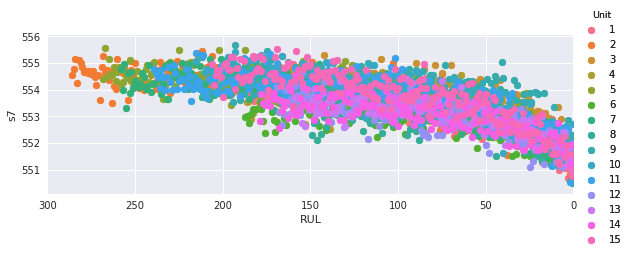

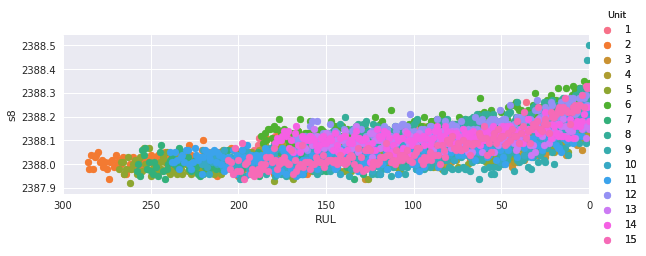

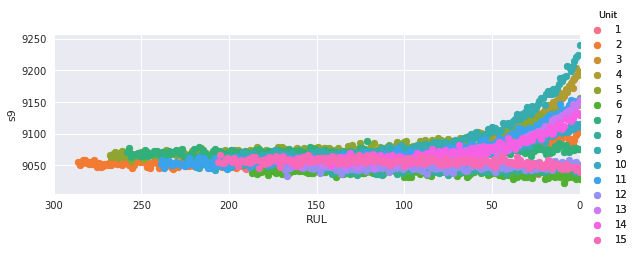

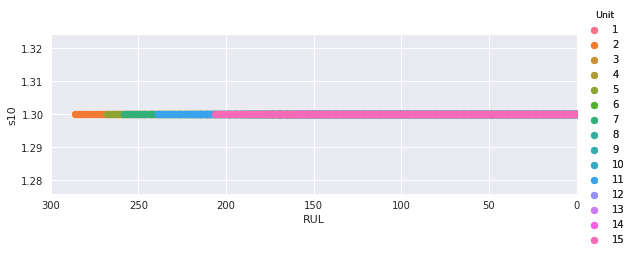

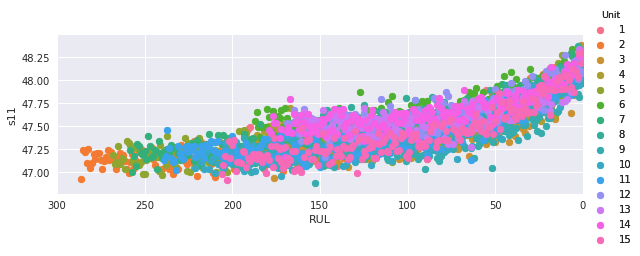

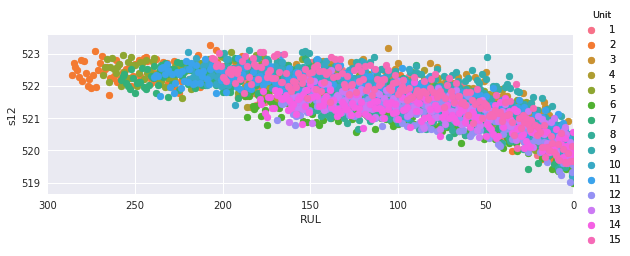

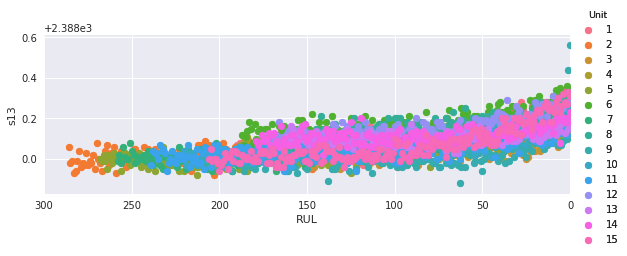

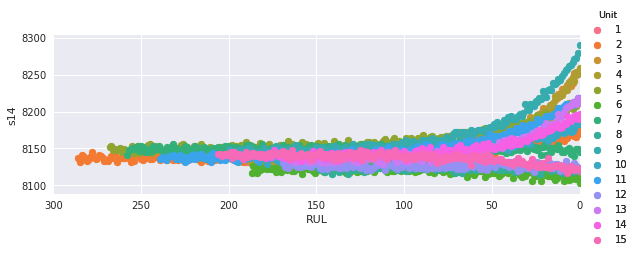

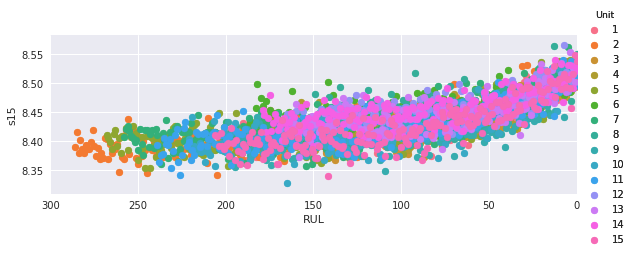

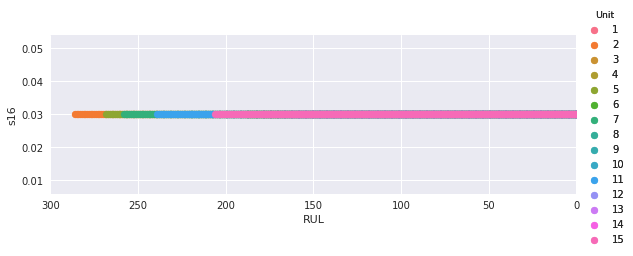

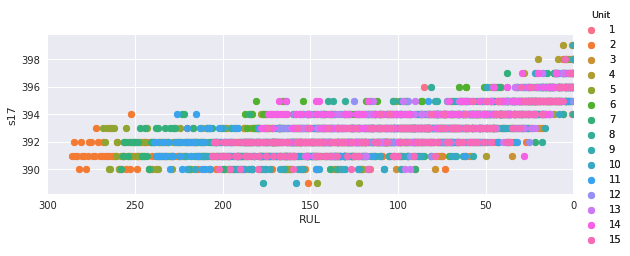

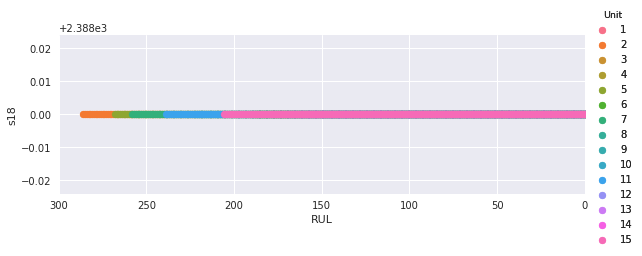

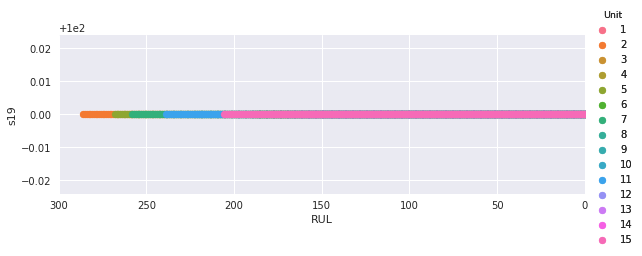

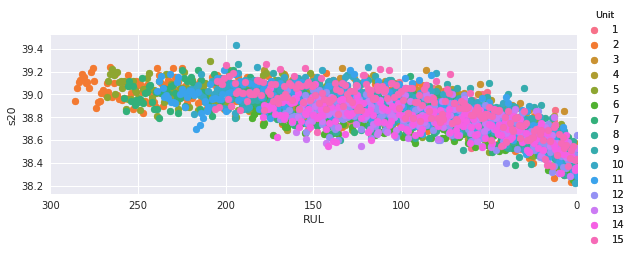

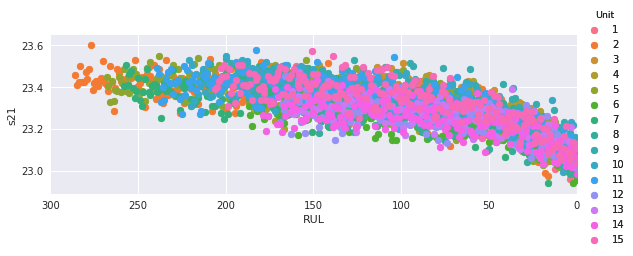

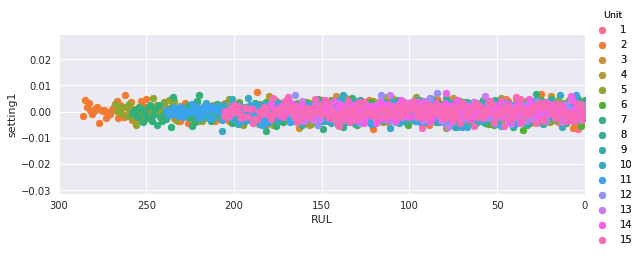

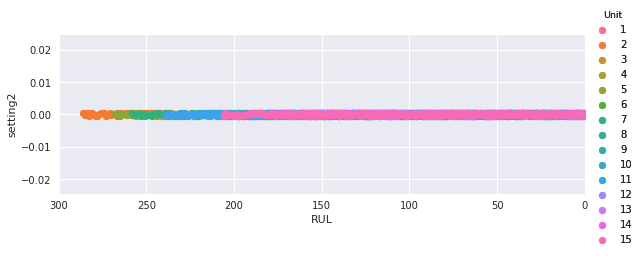

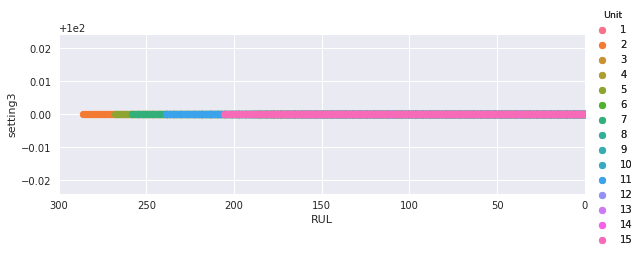

In [10]:
# Visualize train data

# Plot each feature (y-axis) vs RUL (x-axis)
target_value = ['RUL']
plot_data = engine_data.copy(deep=True)
plot_data["RUL"] = RUL_train
for i in range(24):
    graph = sns.pairplot(plot_data[plot_data["Unit"] <= 15], x_vars=target_value, 
                         y_vars=(sensor_columns + settings_columns)[i], hue="Unit", size=3, aspect=2.5)
    graph = graph.map(plt.scatter)
    graph = graph.set(xlim=(300,0))
    graph = graph.add_legend()

From the above visualizations, it is clear that value of some sensors and settings remains constant over the Remaining useful life (RUL) e.g. s18. Therefore we can ignore these features while building the model. Some sensors have a direct relation with the Remaining useful life (RUL). e.g. s11. Some sensors do not have a direct relation with the RUL. e.g. s6.

# Feature Transformation

In [12]:
# Dimensionality Reduction of Train Data

from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

# These features are being dropped based on the observation from exploratory data analysis
features_dropped = ['Unit', 'setting1', 'setting2', 'setting3', 's1', 's5', 's10', 's16', 's18', 's19']

normalized_data = engine_data.copy(deep=True).drop(features_dropped, axis=1)
# Scale the train data using the natural logarithm
normalized_data = np.log(normalized_data)

n_components = 13

# Apply PCA by fitting the normalized data with 13 dimensions
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(normalized_data)
reduced_data = pd.DataFrame(reduced_data, columns=['Dimension ' + str(i+1) for i in range(n_components)])

variance = pd.DataFrame(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

# Dimensionality Reduction of Test Data

# Since remaining_RUL_test contains RUL only for the last cycle in the test data set, 
# we only keep the last cycle for each engine in the test data set
last_cycle = engine_data_test.copy(deep=True).groupby(['Unit'])["Cycle"].max().reset_index()
normalized_data_test = engine_data_test.copy(deep=True)
normalized_data_test = pd.merge(last_cycle, normalized_data_test, how="inner", on=["Unit", "Cycle"])
normalized_data_test = normalized_data_test.drop(features_dropped, axis=1)
# Scale the test data using the natural logarithm
normalized_data_test = np.log(normalized_data_test)

# transform normalized_data_test using the pca fit
reduced_data_test = pca.transform(normalized_data_test)
reduced_data_test = pd.DataFrame(reduced_data_test, columns=['Dimension ' + str(i+1) for i in range(n_components)])


[0.99985209 0.99994912 0.99995997 0.99996777 0.99997473 0.99998128
 0.99998759 0.99999344 0.9999985  0.99999918 0.99999958 0.99999982
 1.        ]


## Train and evaluate the model

### Predict RUL using Regression

,Mean Squared Error
Neural Network,1479.338352
Linear,1483.189040
BayesianRidge,1483.274034
RandomForest,1493.062322
Bagging,1503.592777
Huber,1524.633002
AdaBoost,1622.883758
Ridge,1748.635426
SVM,2067.976556
Lasso,2390.647345


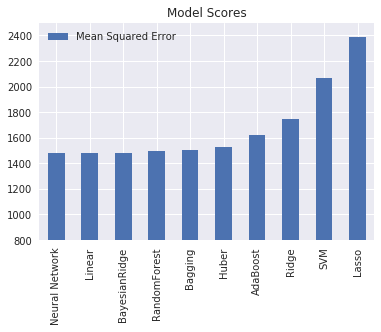

In [15]:
# RUL Model selection (Regression)

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, HuberRegressor, Lasso
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR  
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor



def analyse_regression_models(train, labels):
    results = {}
    
    def test_model(clf):
        cv = KFold(n_splits=2, shuffle=True, random_state=20)
        mse = make_scorer(mean_squared_error)
        mse_val_score = cross_val_score(clf, train, labels, cv=cv, scoring=mse)
        scores = [mse_val_score.mean()]
        return scores
    
    clf = LinearRegression()
    results["Linear"] = test_model(clf)
    
    clf = Ridge()
    results["Ridge"] = test_model(clf)
    
    clf = BayesianRidge()
    results["BayesianRidge"] = test_model(clf)
    
    clf = HuberRegressor()
    results["Huber"] = test_model(clf)
    
    clf = Lasso()
    results["Lasso"] = test_model(clf)
    
    clf = MLPRegressor()
    results["Neural Network"] = test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"] = test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"] = test_model(clf)
    
    clf = AdaBoostRegressor()
    results["AdaBoost"] = test_model(clf)
    
    clf = SVR()
    results["SVM"] = test_model(clf)
    
    results = pd.DataFrame.from_dict(results, orient='index')
    results.columns = ["Mean Squared Error"] 
    results = results.sort_values(by=["Mean Squared Error"], ascending=True)
    results.plot(kind="bar", title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([800, 2500])
    return results

analyse_regression_models(reduced_data, RUL_train)

Since Neural Network has the least mean squared error (MSE), it will be used to predict RUL for the turbofan engine.

MLPRegressor(activation='relu', alpha=0.0001, batch_size=100, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=105, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.95,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=20, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Mean Absolute error: 22.146066020822612
Mean Squared error: 810.2160492059375


Text(0.5, 1.0, 'Fitted Values')

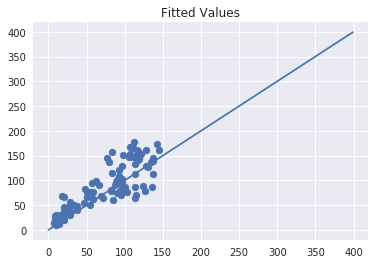

In [20]:
# Train and Test the selected model for RUL (Regression)
# Predict RUL for turbofan engine using Regression

from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neural_network import MLPRegressor

cv = KFold(n_splits=2, shuffle=True, random_state=20)

# Parameter list for tuning
parameters = {
    'hidden_layer_sizes': [105],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001],
    'momentum': [0.95],
    'batch_size': [100]
}

# Initialise MLPRegressor
clf = MLPRegressor(random_state=20)
mse = make_scorer(mean_squared_error)

# Perform Grid Search using mse as the scoring method
grid_obj = GridSearchCV(clf, parameters, cv=cv, scoring=mse)

# Fit the grid search to the training data and find the optimal parameters
grid_fit = grid_obj.fit(reduced_data, RUL_train)

# Get the best estimator
best_clf = grid_fit.best_estimator_ 
print(best_clf)

best_clf.fit(reduced_data, RUL_train)

RUL_predictions = best_clf.predict(reduced_data_test)

print("Mean Absolute error: " + str(mean_absolute_error(RUL_predictions, RUL_test)))
print("Mean Squared error: " + str(mean_squared_error(RUL_predictions, RUL_test)))

# Plot the predicted RUL values against the actual RUL values
plt.scatter(RUL_test, RUL_predictions)
# line of perfect fit
straight_line = np.arange(0, 400)
plt.plot(straight_line, straight_line)
plt.title("Fitted Values")

### Predict if an engine will fail within x1 cycles using Binary Classification

Value of x1 is 30 in this case

KNeighbors
SVC
GaussianProcess
GaussianNB
QuadraticDiscriminantAnalysis
Neural Network
AdaBoost
Decision Tree
RandomForest


,Accuracy
AdaBoost,0.959721
Decision Tree,0.958073
GaussianNB,0.952014
KNeighbors,0.947458
QuadraticDiscriminantAnalysis,0.944792
RandomForest,0.880810
GaussianProcess,0.872667
Neural Network,0.850468
SVM,0.849741


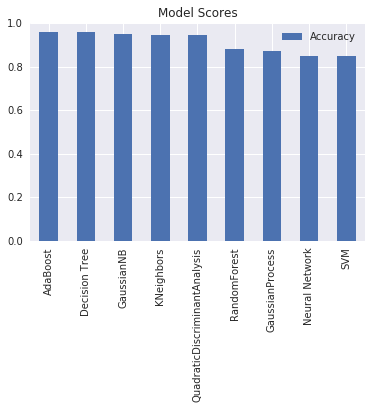

In [23]:
# Model selection (Binary classification)

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



def analyse_binary_classification_models(train, labels):
    results = {}
    
    def test_model(clf):
        cv = KFold(n_splits=2, shuffle=True, random_state=20)
        accuracy = make_scorer(accuracy_score)
        accuracy_val_score = cross_val_score(clf, train, labels, cv=cv, scoring=accuracy)
        scores = [accuracy_val_score.mean()]
        return scores
    
    clf = KNeighborsClassifier(3)
    print("KNeighbors")
    results["KNeighbors"] = test_model(clf)
    
    clf = SVC()
    print("SVC")
    results["SVM"] = test_model(clf)
    
    clf = GaussianProcessClassifier()
    print("GaussianProcess")
    results["GaussianProcess"] = test_model(clf)
    
    clf = GaussianNB()
    print("GaussianNB")
    results["GaussianNB"] = test_model(clf)
    
    clf = QuadraticDiscriminantAnalysis()
    print("QuadraticDiscriminantAnalysis")
    results["QuadraticDiscriminantAnalysis"] = test_model(clf)
    
    clf = MLPClassifier(alpha=1)
    print("Neural Network")
    results["Neural Network"] = test_model(clf)
    
    clf = AdaBoostClassifier()
    print("AdaBoost")
    results["AdaBoost"] = test_model(clf)
    
    clf = DecisionTreeClassifier(max_depth=5)
    print("Decision Tree")
    results["Decision Tree"] = test_model(clf)
    
    clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
    print("RandomForest")
    results["RandomForest"] = test_model(clf)
    
    results = pd.DataFrame.from_dict(results, orient='index')
    results.columns = ["Accuracy"] 
    results = results.sort_values(by=["Accuracy"], ascending=False)
    results.plot(kind="bar", title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0, 1])
    return results

analyse_binary_classification_models(reduced_data, binary_class_train)

Since AdaBoost has the highest accuracy, it will be used to predict whether the engine will fail within 30 days.

In [24]:
# Train and Test the selected model (Binary classification)

from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier


cv = KFold(n_splits=2, shuffle=True, random_state=20)

# Parameter list for tuning
parameters = {
    'learning_rate': [0.7, 1],
    'algorithm': ['SAMME', 'SAMME.R'],
    'n_estimators': [12, 25, 50, 100]
}

# Initialise AdaBoostClassifier
clf = AdaBoostClassifier(random_state=20)

accuracy = make_scorer(accuracy_score)

# Perform Grid Search using accuracy as the scoring method
grid_obj = GridSearchCV(clf, parameters, cv=cv, scoring=accuracy)

# Fit the grid search to the training data and find the optimal parameters
grid_fit = grid_obj.fit(reduced_data, binary_class_train)

# Get the best estimator
best_clf = grid_fit.best_estimator_ 
print(best_clf)

best_clf.fit(reduced_data, binary_class_train)

binary_class_predictions = best_clf.predict(reduced_data_test)

print("Accuracy: " + str(accuracy_score(binary_class_predictions, binary_class_test)))


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.7, n_estimators=50, random_state=20)
Accuracy: 0.94


### Predict if an engine will fail in different time periods using Multi class classification 
In this case, the 3 classes are RUL <=15, 15 < RUL <= 30 and RUL > 30

KNeighbors
SVC
GaussianProcess
GaussianNB
QuadraticDiscriminantAnalysis
Neural Network
AdaBoost
Decision Tree
RandomForest


,Accuracy
AdaBoost,0.937230
Decision Tree,0.935098
GaussianNB,0.927391
QuadraticDiscriminantAnalysis,0.919829
KNeighbors,0.919345
RandomForest,0.864573
GaussianProcess,0.857060
Neural Network,0.850322
SVM,0.849741


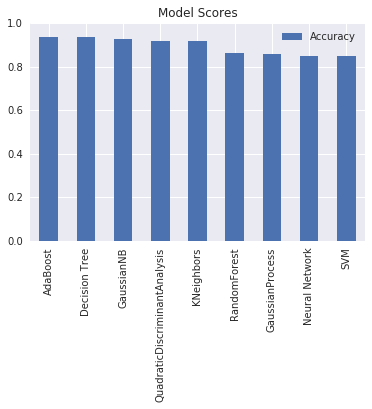

In [27]:
# Multiclass Model selection (Multiclass classification)

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.multiclass import OneVsRestClassifier



def analyse_multiclass_classification_models(train, labels):
    results = {}
    
    def test_model(clf):
        clf = OneVsRestClassifier(clf)
        cv = KFold(n_splits=2, shuffle=True, random_state=20)
        accuracy = make_scorer(accuracy_score)
        accuracy_val_score = cross_val_score(clf, train, labels, cv=cv, scoring=accuracy)
        scores = [accuracy_val_score.mean()]
        return scores
    
    clf = KNeighborsClassifier(3)
    print("KNeighbors")
    results["KNeighbors"] = test_model(clf)
    
    clf = SVC()
    print("SVC")
    results["SVM"] = test_model(clf)
    
    clf = GaussianProcessClassifier()
    print("GaussianProcess")
    results["GaussianProcess"] = test_model(clf)
    
    clf = GaussianNB()
    print("GaussianNB")
    results["GaussianNB"] = test_model(clf)
    
    clf = QuadraticDiscriminantAnalysis()
    print("QuadraticDiscriminantAnalysis")
    results["QuadraticDiscriminantAnalysis"] = test_model(clf)
    
    clf = MLPClassifier(alpha=1)
    print("Neural Network")
    results["Neural Network"] = test_model(clf)
    
    clf = AdaBoostClassifier()
    print("AdaBoost")
    results["AdaBoost"] = test_model(clf)
    
    clf = DecisionTreeClassifier(max_depth=5)
    print("Decision Tree")
    results["Decision Tree"] = test_model(clf)
    
    clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
    print("RandomForest")
    results["RandomForest"] = test_model(clf)
    
    results = pd.DataFrame.from_dict(results, orient='index')
    results.columns = ["Accuracy"] 
    results = results.sort_values(by=["Accuracy"], ascending=False)
    results.plot(kind="bar", title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0, 1])
    return results

analyse_multiclass_classification_models(reduced_data, multi_class_train)

Since AdaBoost has the highest accuracy, it will be used for multiclass classification.

In [29]:
# Train and Test the selected model (Multiclass classification)

from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier


cv = KFold(n_splits=2, shuffle=True, random_state=20)

# Parameter list for tuning
parameters = {
    'learning_rate': [0.7, 1],
    'algorithm': ['SAMME', 'SAMME.R'],
    'n_estimators': [200, 50]
}

# Initialise AdaBoostClassifier
clf = AdaBoostClassifier(random_state=20)

accuracy = make_scorer(accuracy_score)

# Perform Grid Search using accuracy as the scoring method
grid_obj = GridSearchCV(clf, parameters, cv=cv, scoring=accuracy)

# Fit the grid search to the training data and find the optimal parameters
grid_fit = grid_obj.fit(reduced_data, multi_class_train)

# Get the best estimator
best_clf = grid_fit.best_estimator_ 
best_clf = OneVsRestClassifier(best_clf)
print(best_clf)

best_clf.fit(reduced_data, multi_class_train)

multi_class_predictions = best_clf.predict(reduced_data_test)

print("Accuracy: " + str(accuracy_score(multi_class_predictions, multi_class_test)))

OneVsRestClassifier(estimator=AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.7,
          n_estimators=200, random_state=20),
          n_jobs=None)
Accuracy: 0.91


## Conclusion

My plan was to experiment with different ways of assigning the label, to see what gives the best accuracy; if you can predict with high accuracy the exact RUL using regression, that's awesome, and if not, then multiple classes can be selected (RUL <= 15 cycles, 15 cycles < RUL <= 30 cycles , RUL > 30 cycles), and if that doesn't work, then binary classes can be selected (RUL <=  30 cycles and RUL > 30 cycles). 